In [2]:
 import clang
from clang.cindex import *


In [2]:
def parse_file(file_path):
    index = Index.create()
    tu = index.parse(file_path)
    return tu.cursor

In [3]:
file_path = r"C:\Users\ASUS\Downloads\sum.c"
cursor_lists = parse_file(file_path)

In [5]:
print(cursor_lists)

In [31]:
# cursor_object_list = []

# def print_ast(file_path):
#     index = clang.cindex.Index.create()
#     tu = index.parse(file_path)
#     for c in tu.cursor.get_children():
#         cursor_object_list.append(c)
#         print(c)

# file_path = r"C:\Users\ASUS\Downloads\sum.c"
# print_ast(file_path)

In [21]:
import os
print(os.getcwd())

C:\Users\ASUS\Documents\My workspace\MInor Project


In [41]:
print(dot)

digraph {
	A [label="King Arthur"]
	B [label="Sir Bedevere the Wise"]
	L [label="Sir Lancelot the Brave"]
	A -> B
	A -> L
}



In [48]:
import clang.cindex
from anytree import Node

def create_tree(cursor):
    
    node = Node(cursor.displayname, cursor=cursor)
    for child in cursor.get_children():
        child_node = create_tree(child)
        child_node.parent = node
    return node

index = clang.cindex.Index.create()
tu = index.parse('sum.c')
root = create_tree(tu.cursor)

In [49]:
print(root)

Node('/sum.c', cursor=<clang.cindex.Cursor object at 0x000001CD6CFD5740>)


In [ ]:
import clang.cindex
from graphviz import Digraph

def create_graph(cursor, dot):
    """ Create a graph-like structure from a libclang cursor. """
    dot.node(str(cursor), cursor.displayname)
    for child in cursor.get_children():
        create_graph(child, dot)
        dot.edge(str(cursor), str(child))

index = clang.cindex.Index.create()
tu = index.parse('sum.c')
dot = Digraph()
create_graph(tu.cursor, dot)
dot

In [2]:
from anytree import Node, RenderTree

root = Node("root")
child1 = Node("child1", parent=root)
child2 = Node("child2", parent=root)

for pre, fill, node in RenderTree(root):
    print("%s%s" % (pre, node.name))

root
├── child1
└── child2


In [3]:
import clang.cindex
from anytree import Node, RenderTree

def create_tree(cursor):
    """ Create a tree-like structure from a libclang cursor. """
    node = Node(cursor.displayname, cursor=cursor)
    for child in cursor.get_children():
        child_node = create_tree(child)
        child_node.parent = node
    return node

index = clang.cindex.Index.create()
tu = index.parse('sum.c')
root = create_tree(tu.cursor)
for pre, fill, node in RenderTree(root):
    print("%s%s" % (pre, node.name))

sum.c
├── uintptr_t
├── va_list
├── __va_start(va_list *, ...)
│   └── 
│       └── va_list
├── size_t
├── ptrdiff_t
├── intptr_t
├── __vcrt_bool
├── wchar_t
├── __security_init_cookie()
├── __security_check_cookie(uintptr_t)
│   └── _StackCookie
│       └── uintptr_t
├── __report_gsfailure(uintptr_t)
│   └── _StackCookie
│       └── uintptr_t
├── __security_cookie
│   └── uintptr_t
├── __crt_bool
├── _invalid_parameter_noinfo()
├── _invalid_parameter_noinfo_noreturn()
├── _invoke_watson(const wchar_t *, const wchar_t *, const wchar_t *, unsigned int, uintptr_t)
│   ├── _Expression
│   │   └── wchar_t
│   ├── _FunctionName
│   │   └── wchar_t
│   ├── _FileName
│   │   └── wchar_t
│   ├── _LineNo
│   └── _Reserved
│       └── uintptr_t
├── errno_t
├── wint_t
├── wctype_t
├── __time32_t
├── __time64_t
├── __crt_locale_data_public
│   ├── _locale_pctype
│   ├── _locale_mb_cur_max
│   └── _locale_lc_codepage
├── __crt_locale_data_public
│   └── __crt_locale_data_public
│       ├── _locale_

In [3]:
import clang.cindex
from anytree import Node, RenderTree

def create_tree(cursor):
    """ Create a tree-like structure from a libclang cursor. """
    node = Node(cursor.displayname, cursor=cursor)
    for child in cursor.get_children():
        child_node = create_tree(child)
        child_node.parent = node
    return node

# C code that adds two numbers
code = '''
int sum(int a, int b) {
    return a + b;
}
'''

index = clang.cindex.Index.create()
tu = index.parse('sum.c', unsaved_files=[('sum.c', code)])

# Find the sum function
for cursor in tu.cursor.get_children():
    if cursor.spelling == 'sum':
        root = create_tree(cursor)

for pre, fill, node in RenderTree(root):
    print("%s%s" % (pre, node.name))

sum(int, int)
├── a
├── b
└── 
    └── 
        └── 
            ├── a
            │   └── a
            └── b
                └── b


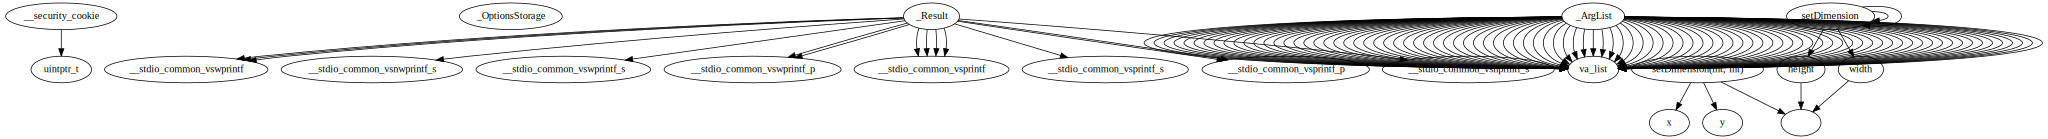

In [3]:
import clang.cindex
from graphviz import Digraph

def create_graph(cursor, dot, function_name):
    
    if cursor.spelling == function_name or cursor.kind == clang.cindex.CursorKind.VAR_DECL :
        dot.node(str(cursor.displayname), cursor.displayname)
        for child in cursor.get_children():
            create_graph(child, dot, function_name)
            dot.edge(str(cursor.displayname), str(child.displayname))
    else:
        for child in cursor.get_children():
            create_graph(child, dot, function_name)

# C code that contains a function

index = clang.cindex.Index.create()
tu = index.parse('swap.c')

# Create a graph only for the sum function
dot = Digraph()
create_graph(tu.cursor, dot, "setDimension")
dot

In [18]:
print(translation_unit)

In [198]:
# index = clang.cindex.Index.create()
# translation_unit = index.parse('swap.c')
# cursor = translation_unit.cursor


# def get_argument_name(arg):
#     if arg.kind == clang.cindex.CursorKind.DECL_REF_EXPR:
#         return arg.referenced.spelling
#     return arg.spelling

# # desired function arguments

# desired_arguments = ['height','width']

# # Find the specific node in the AST tree that you want to modify
# for child in cursor.get_children():
# #     print(child.kind)

#     args = child.get_arguments()
#     for arg in args:
#            print(get_argument_name(arg))

#     if child.kind == clang.cindex.CursorKind.FUNCTION_DECL:

# #         args = child.get_arguments()
# #         for arg in args:
# #            print(arg.displayname)
#         arg_name = [arg.displayname for arg in args]
# #         print(arg_name)
#         if arg_name == desired_arguments:
#             desired_function_node = child
#             break
#         else: 
#          print("there is no such argument")
            
# #     print(child.kind)
# #     if child.spelling == 'setDimension' :
# #         example_function_node = child
# #         break
        
# # args = example_function_node.get_arguments()
# # for arg in args:
# #     print(arg.displayname)

# # Search for the nodes representing the variables you want to swap
# # var1_node = None
# # var2_node = None
# # for child in example_function_node.get_children():
# # #     print(child.kind)

        
# #     print(child.displayname)
# #     if child.kind == clang.cindex.CursorKind.VAR_DECL and child.displayname == '':
# #         var1_node = child
# #     if child.kind == clang.cindex.CursorKind.VAR_DECL and child.displayname == 'var2':
# #         var2_node = child
# #     if var1_node and var2_node:
# #         break

# # # Swap the names of the variables
# # var1_node.displayname, var2_node.displayname = var2_node.displayname, var1_node.displayname

# # # Re-parse the code to generate the modified AST
# # translation_unit = index.parse('swap.c')

In [97]:
index = clang.cindex.Index.create()
translation_unit = index.parse('swap.c')
cursor = translation_unit.cursor

# Iterate over the children of the cursor
for child in cursor.get_children():
    # Check if the child cursor is a function declaration
    if child.kind == clang.cindex.CursorKind.FUNCTION_DECL:
        # Print the name of the function
        print(child.spelling)
        
          # Get the arguments of the function
        args = child.get_arguments()
        for arg in args:
            print(arg.spelling)

__va_start

__security_init_cookie
__security_check_cookie
_StackCookie
__report_gsfailure
_StackCookie
_invalid_parameter_noinfo
_invalid_parameter_noinfo_noreturn
_invoke_watson
_Expression
_FunctionName
_FileName
_LineNo
_Reserved
__local_stdio_printf_options
__local_stdio_scanf_options
__acrt_iob_func
_Ix
fgetwc
_Stream
_fgetwchar
fputwc
_Character
_Stream
_fputwchar
_Character
getwc
_Stream
getwchar
fgetws
_Buffer
_BufferCount
_Stream
fputws
_Buffer
_Stream
_getws_s
_Buffer
_BufferCount
putwc
_Character
_Stream
putwchar
_Character
_putws
_Buffer
ungetwc
_Character
_Stream
_wfdopen
_FileHandle
_Mode
_wfopen
_FileName
_Mode
_wfopen_s
_Stream
_FileName
_Mode
_wfreopen
_FileName
_Mode
_OldStream
_wfreopen_s
_Stream
_FileName
_Mode
_OldStream
_wfsopen
_FileName
_Mode
_ShFlag
_wperror
_ErrorMessage
_wpopen
_Command
_Mode
_wremove
_FileName
_wtempnam
_Directory
_FilePrefix
_wtmpnam_s
_Buffer
_BufferCount
_wtmpnam
_Buffer
_fgetwc_nolock
_Stream
_fputwc_nolock
_Character
_Stream
_getwc_nol

In [128]:
index = clang.cindex.Index.create()
translation_unit = index.parse('swap.c')
cursor = translation_unit.cursor

# Iterate over the children of the cursor
for child in cursor.get_children():
    print(child.kind)
    # Check if the child cursor is a function declaration
    if child.kind == clang.cindex.CursorKind.FUNCTION_DECL:
        # Print the name of the function
        print("Function name: ", child.spelling)
        # Get the arguments of the function
        args = child.get_arguments()
        for arg in args:
            print("Argument name: ",arg.spelling," Argument Type:", arg.type.spelling)

CursorKind.TYPEDEF_DECL
CursorKind.TYPEDEF_DECL
CursorKind.FUNCTION_DECL
Function name:  __va_start
Argument name:    Argument Type: va_list *
CursorKind.TYPEDEF_DECL
CursorKind.TYPEDEF_DECL
CursorKind.TYPEDEF_DECL
CursorKind.TYPEDEF_DECL
CursorKind.TYPEDEF_DECL
CursorKind.FUNCTION_DECL
Function name:  __security_init_cookie
CursorKind.FUNCTION_DECL
Function name:  __security_check_cookie
Argument name:  _StackCookie  Argument Type: uintptr_t
CursorKind.FUNCTION_DECL
Function name:  __report_gsfailure
Argument name:  _StackCookie  Argument Type: uintptr_t
CursorKind.VAR_DECL
CursorKind.TYPEDEF_DECL
CursorKind.FUNCTION_DECL
Function name:  _invalid_parameter_noinfo
CursorKind.FUNCTION_DECL
Function name:  _invalid_parameter_noinfo_noreturn
CursorKind.FUNCTION_DECL
Function name:  _invoke_watson
Argument name:  _Expression  Argument Type: const wchar_t *
Argument name:  _FunctionName  Argument Type: const wchar_t *
Argument name:  _FileName  Argument Type: const wchar_t *
Argument name: 

In [130]:
index = clang.cindex.Index.create()
translation_unit = index.parse('swap.c')
cursor = translation_unit.cursor

# Iterate over the children of the cursor
for child in cursor.get_children():
    # Check if the child cursor is a function declaration or definition
    if child.kind == clang.cindex.CursorKind.FUNCTION_DECL:
        if child.location.file.name == 'setDimension.h':
            print("Function Declaration: ", child.spelling)
        else:
            print("Function Definition: ", child.spelling)

Function Definition:  __va_start
Function Definition:  __security_init_cookie
Function Definition:  __security_check_cookie
Function Definition:  __report_gsfailure
Function Definition:  _invalid_parameter_noinfo
Function Definition:  _invalid_parameter_noinfo_noreturn
Function Definition:  _invoke_watson
Function Definition:  __local_stdio_printf_options
Function Definition:  __local_stdio_scanf_options
Function Definition:  __acrt_iob_func
Function Definition:  fgetwc
Function Definition:  _fgetwchar
Function Definition:  fputwc
Function Definition:  _fputwchar
Function Definition:  getwc
Function Definition:  getwchar
Function Definition:  fgetws
Function Definition:  fputws
Function Definition:  _getws_s
Function Definition:  putwc
Function Definition:  putwchar
Function Definition:  _putws
Function Definition:  ungetwc
Function Definition:  _wfdopen
Function Definition:  _wfopen
Function Definition:  _wfopen_s
Function Definition:  _wfreopen
Function Definition:  _wfreopen_s
Funct

In [9]:
index = clang.cindex.Index.create()
translation_unit = index.parse('swap.c')
cursor = translation_unit.cursor

for child in cursor.get_children():
#     print(child.kind)
    if child.kind == clang.cindex.CursorKind.FUNCTION_DECL:
#         print(child.spelling)

        if child.spelling == 'main':
            
            for inside_main_function in child.get_children():
#                     print(inside_main_function.kind)
#                 print(clang.cindex.CursorKind.FUNCTION_DECL)
                
                    if inside_main_function.kind == clang.cindex.CursorKind.COMPOUND_STMT:
            
                       for inside_main_compound_stmt in inside_main_function.get_children():
                            print(inside_main_compound_stmt.kind)
#                             print(inside_main_compound_stmt.spelling)
                        
                            if inside_main_compound_stmt.spelling == 'setDimension':
                                      set_function_node = inside_main_compound_stmt
                                      break
        
# args = set_function_node.get_arguments()
# for arg in args:
#     print(arg.displayname)
    
                                
# print(set_function_node.spelling)               
# Search for the nodes representing the variables you want to swap

width_node = None
height_node = None

for inner_child in set_function_node.get_children():
#     print(inner_child.kind)
#     print(inner_child.displayname)
    
    print(inner_child.kind)
    if inner_child.spelling == 'width':
        width_node = inner_child
    if inner_child.spelling == 'height':
        height_node = inner_child
    if width_node and height_node:
        break

# print(width_node.spelling)
# # Swap the names of the variables
width_node.displayname, height_node.displayname = height_node.displayname, width_node.displayname

# # Re-parse the code to generate the modified AST
translation_unit = index.parse('swap.c')

CursorKind.DECL_STMT
CursorKind.CALL_EXPR
CursorKind.UNEXPOSED_EXPR
CursorKind.UNEXPOSED_EXPR
CursorKind.UNEXPOSED_EXPR


AttributeError: can't set attribute

In [229]:
index = clang.cindex.Index.create()
translation_unit = index.parse('swap.c')
cursor = translation_unit.cursor

for child in cursor.get_children():
    print(child.spelling)

uintptr_t
va_list
__va_start
size_t
ptrdiff_t
intptr_t
__vcrt_bool
wchar_t
__security_init_cookie
__security_check_cookie
__report_gsfailure
__security_cookie
__crt_bool
_invalid_parameter_noinfo
_invalid_parameter_noinfo_noreturn
_invoke_watson
errno_t
wint_t
wctype_t
__time32_t
__time64_t
__crt_locale_data_public
__crt_locale_data_public
__crt_locale_pointers
__crt_locale_pointers
_locale_t
_Mbstatet
_Mbstatet
mbstate_t
time_t
rsize_t
__local_stdio_printf_options
__local_stdio_scanf_options
_iobuf
FILE
__acrt_iob_func
fgetwc
_fgetwchar
fputwc
_fputwchar
getwc
getwchar
fgetws
fputws
_getws_s
putwc
putwchar
_putws
ungetwc
_wfdopen
_wfopen
_wfopen_s
_wfreopen
_wfreopen_s
_wfsopen
_wperror
_wpopen
_wremove
_wtempnam
_wtmpnam_s
_wtmpnam
_fgetwc_nolock
_fputwc_nolock
_getwc_nolock
_putwc_nolock
_ungetwc_nolock
__stdio_common_vfwprintf
__stdio_common_vfwprintf_s
__stdio_common_vfwprintf_p
_vfwprintf_l
vfwprintf
_vfwprintf_s_l
vfwprintf_s
_vfwprintf_p_l
_vfwprintf_p
_vwprintf_l
vwprintf
_vwp

__security_cookie
_OptionsStorage
_OptionsStorage
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_Result
_Result
_Result
_Result
_Result
_Result
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_ArgList
_Result
_A

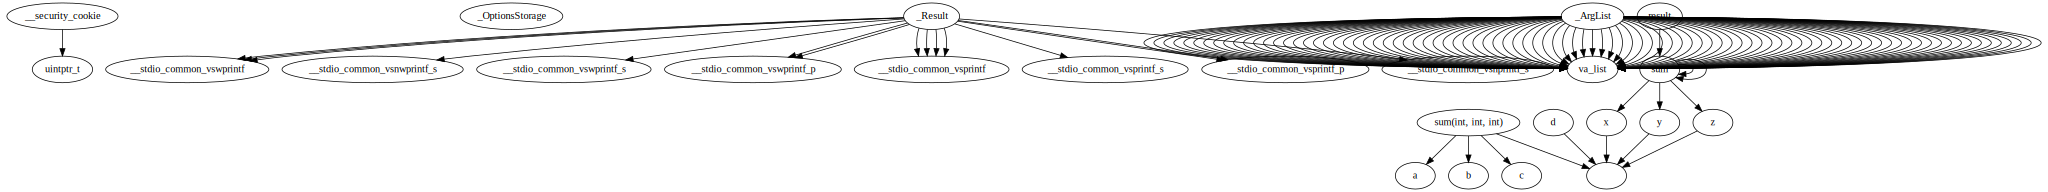

In [266]:
import clang.cindex
from graphviz import Digraph

def create_graph(cursor, dot, function_name):
   

    if cursor.spelling == function_name or cursor.kind == clang.cindex.CursorKind.VAR_DECL:
        print(cursor.spelling)
        dot.node(str(cursor.displayname), cursor.displayname)
        for child in cursor.get_children():
            create_graph(child, dot, function_name)
            dot.edge(str(cursor.displayname), str(child.displayname))
    else:
        for child in cursor.get_children():
            create_graph(child, dot, function_name)

# C code that contains a function
code = '''
int sum(int a, int b) {
    int d =  a + b;
    return d;
}
'''

index = clang.cindex.Index.create()
tu = index.parse('sum.c')

# Create a graph only for the sum function
dot = Digraph()
create_graph(tu.cursor, dot, "sum")
dot


In [11]:
from libclang import parser

ModuleNotFoundError: No module named 'libclang'

In [70]:
index = clang.cindex.Index.create()
translation_unit = index.parse('sum.c')

cursor = translation_unit.cursor

for child in cursor.get_children():
#     print(child.kind)
    if child.kind == clang.cindex.CursorKind.FUNCTION_DECL:
#             print(child.spelling)

#         if child.spelling == 'main':
            
            for inside_main_function in child.get_children():
#                     print(inside_main_function.kind)
#                 print(clang.cindex.CursorKind.FUNCTION_DECL)
                
                    if inside_main_function.kind == clang.cindex.CursorKind.COMPOUND_STMT:
#                        print(inside_main_function.kind)
            
                       for inside_main_compound_stmt in inside_main_function.get_children():
#                                       print(inside_main_compound_stmt.kind)
                            # print(inside_main_compound_stmt.spelling)
                        
                            if inside_main_compound_stmt.spelling == 'setDimension' and inside_main_compound_stmt.kind ==  clang.cindex.CursorKind.CALL_EXPR :
                                      if inside_main_compound_stmt.kind == clang.cindex.CursorKind.DECL_STMT:
                    
                                         for inside_main_compound_stmt_inner_inner in inside_main_compound_stmt.get_children():
                                            print(inside_main_compound_stmt_inner_inner.kind)
#                                             set_function_node = inside_main_compound_stmt

                                            if inside_main_compound_stmt_inner_inner.kind == clang.cindex.CursorKind.VAR_DECL:
                                                    for inside_main_compound_stmt_inner_inner_inner in inside_main_compound_stmt_inner_inner.get_children():
                                                        if inside_main_compound_stmt_inner_inner_inner.kind == clang.cindex.CursorKind.CALL_EXPR:
                                                            
                                                            set_function_node = inside_main_compound_stmt_inner_inner_inner      
        
                                                            break
      
    
args = set_function_node.get_arguments()
for arg in args:
    print(arg.spelling)
    
                                
# print(set_function_node)               
# Search for the nodes representing the variables you want to swap

# width_node = None
# height_node = None

# for inner_child in set_function_node.get_children():
#     # print(inner_child.kind)
#     # print(inner_child.displayname)
    
#     if inner_child.spelling == 'width':
#         width_node = inner_child
#     if inner_child.spelling == 'height':
#         height_node = inner_child
#     if width_node and height_node:
#         break

# # print(width_node)
# # Swap the names of the variables
# temp = width_node
# width_node = height_node
# height_node = temp

# # Re-parse the code to generate the modified AST
# index = clang.cindex.Index.create()
# # tu = index.parse('swap.c', unsaved_files=[('swap.c', code)])
# tu = index.parse('swap.c')

# # Create a graph only for the sum function
# dot = Digraph()
# create_graph(tu.cursor, dot, "setDimension")
# dot
# # Create a graph only for the sum function




x
y
z


In [60]:
index = clang.cindex.Index.create()
translation_unit = index.parse('swap.c')

cursor = translation_unit.cursor

def find_callexpr(cursor):
    for child in cursor.get_children():
        print(child.kind)
        if child.kind ==  clang.cindex.CursorKind.CALL_EXPR:
#             return child
#             print(child.get_arguments())
            args = []
            for arg in child.get_arguments():
                print(arg.spelling)
        
        for inner_child in child.get_children():
            result = find_callexpr(inner_child)
            
            if result is not None:
                return result
   
    return None
        


In [61]:
find_callexpr(cursor)

CursorKind.TYPEDEF_DECL
CursorKind.TYPEDEF_DECL
CursorKind.FUNCTION_DECL
CursorKind.TYPE_REF
CursorKind.TYPEDEF_DECL
CursorKind.TYPEDEF_DECL
CursorKind.TYPEDEF_DECL
CursorKind.TYPEDEF_DECL
CursorKind.TYPEDEF_DECL
CursorKind.FUNCTION_DECL
CursorKind.FUNCTION_DECL
CursorKind.TYPE_REF
CursorKind.FUNCTION_DECL
CursorKind.TYPE_REF
CursorKind.VAR_DECL
CursorKind.TYPEDEF_DECL
CursorKind.FUNCTION_DECL
CursorKind.FUNCTION_DECL
CursorKind.FUNCTION_DECL
CursorKind.TYPE_REF
CursorKind.TYPE_REF
CursorKind.TYPE_REF
CursorKind.TYPE_REF
CursorKind.TYPEDEF_DECL
CursorKind.TYPEDEF_DECL
CursorKind.TYPEDEF_DECL
CursorKind.TYPEDEF_DECL
CursorKind.TYPEDEF_DECL
CursorKind.STRUCT_DECL
CursorKind.TYPEDEF_DECL
CursorKind.FIELD_DECL
CursorKind.FIELD_DECL
CursorKind.FIELD_DECL
CursorKind.STRUCT_DECL
CursorKind.TYPE_REF
CursorKind.TYPE_REF
CursorKind.TYPEDEF_DECL
CursorKind.STRUCT_DECL
CursorKind.FIELD_DECL
CursorKind.STRUCT_DECL
CursorKind.FIELD_DECL
CursorKind.TYPEDEF_DECL
CursorKind.STRUCT_DECL
CursorKind.TYPED

In [71]:
index = clang.cindex.Index.create()
translation_unit = index.parse('swap.c')

cursor = translation_unit.cursor

def find_callexpr(cursor):
    for child in cursor.get_children():
        if child.kind ==  clang.cindex.CursorKind.CALL_EXPR:
            parent_spelling = clang.cindex.conf.lib.clang_getCursorSpelling(child.semantic_parent)
            if parent_spelling.decode() == 'main':
                args = []
                for arg in child.get_arguments():
                    print(arg.spelling)
        for inner_child in child.get_children():
            result = find_callexpr(inner_child)
            if result is not None:
                return result
    return None

In [63]:
find_callexpr(cursor)

ArgumentError: argument 1: <class 'TypeError'>: expected Cursor instance instead of NoneType